<a href="https://colab.research.google.com/github/AygulKhabibullina/studying/blob/main/%D0%9A%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D1%8B%D0%B8%CC%86_%D1%81%D0%BA%D0%BE%D1%80%D0%B8%D0%BD%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Перевод, разбор и комментари решения:

https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline/notebook

Благодарность автору:
https://www.kaggle.com/kabure/code

# Содержание:

**1. [Введение]** <br>
    - Описание данных <br>

**2. [Библиотеки]** <br>
    - Импорт библиотек <br>
    - Импорт данных <br>

**3. [Изучение данных]** <br>
    - 3.1 Поиск типа данных <br>
    - 3.2 Форма данных <br>
    - 3.3 Нулевые значения <br>
    - 3.4 Уникальные значения <br>
    - 3.5 Первые строки <br>

**4. [Визуализация данных]** <br>
    - 4.1 Составление графической и описательной информации <br>

**5. [Корреляция данных](# Correlation)** <br>
    - 5.1 Корреляционные данные <br>
    
**6. [Предварительная обработка]**<br>
    - 6.1 Импорт библиотек <br>
    - 6.2 Настройка X и Y <br>
    - 6.3 Разделение X и Y в обучении и тесте <br>
    
**7. 1 [Модель 1]** <br>
    - 7.1.1 Случайный лес <br>
    - 7.1.2 Определение качества <br>
    - 7.1.3 Кросс-валидация <br>
    
**7. 2 [Модель 2]** <br>
    - 7.2.1 Логистическая регрессия <br>
    - 7.2.2 Определение качества <br>
    - 7.2.3 Кросс-валидация <br>
    - 7.2.4 Кривая ROC<br>

<a id="Introduction"></a> <br>


# **1. Введение:**
<h2>О датасете</h2>
Исходный набор данных содержит 1000 записей с 20 категориальными / символическими атрибутами, подготовленными профессором Хофманном. В этом наборе данных каждая запись представляет человека, который берет кредит в банке. Каждый человек классифицируется как имещий хороший или плохой кредитный риск в соответствии с набором атрибутов. Ссылка на исходный набор данных может быть найдена ниже.

<h2>Содержание датасета</h2>
Почти невозможно понять исходный набор данных из-за его сложности. Таким образом, автором написан небольшой скрипт на Python для преобразования его в читаемый CSV-файл. Несколько столбцов просто игнорируются, потому что, они либо не значимы для анализа, либо их описания неинформативны. Выбранные атрибуты:

<b>Age </b> (числовой) <br>
<b>Sex </b> (текст: мужчина, женщина) <br>
<b>Job </b> (числовой: 0 - неквалифицированный и нерезидент, 1 - неквалифицированный и резидент, 2 - квалифицированный, 3 - высококвалифицированный) <br>
<b>Housing</b> (текст: собственный, арендный или бесплатный) <br>
<b>Saving accounts</b> (текст - маленький, умеренный, довольно богатый, богатый) <br>
<b>Checking account </b> (числовой, в DM - немецкая марка) <br>
<b>Credit amount</b> (числовой, в DM) <br>
<b>Duration</b> (числовой, в месяце) <br>
<b>Purpose</b> (текст: автомобиль, мебель / оборудование, радио / ТВ, бытовая техника, ремонт, образование, бизнес, отдых / др. <br>
<b>Risk </b> (целевое значение - хороший или плохой риск) <br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="Librarys"></a> <br>

# **2. Библиотеки:**
- Импорт библиотек
- Импорт данных

In [93]:
#Импорт библиотек
import pandas as pd #Работа с датасетами
import numpy as np #Математическая библиотека
import seaborn as sns #Графическая библиотека, использующая matplot
import matplotlib.pyplot as plt #для выстраивания параметров в seaborn

#Импорт датасета
df_credit = pd.read_csv("german_credit_data1.csv",index_col=0)

#Замена заголовков на русские значения
df_credit.rename(columns={'Age': 'Возраст', 'Job': 'Место работы', 'Sex': 'Пол','Housing': 'Жилищные условия','Saving accounts': 'Сберегательные счета','Checking account': 'Обычные счета', 'Credit amount': 'Сумма кредита', 'Duration': 'Срок кредита', 'Purpose': 'Цель', 'Risk': 'Риск'}, inplace=True)
#Замена значений на русские слова
df_credit.replace('male', 'мужской', inplace=True)
df_credit.replace('female', 'женский', inplace=True)
df_credit.replace('own', 'собственность', inplace=True)
df_credit.replace('rent', 'аренда', inplace=True)
df_credit.replace('free', 'бесплатное жилье', inplace=True)
df_credit.replace('radio/TV', 'радио/TV', inplace=True)
df_credit.replace('education', 'образование', inplace=True)
df_credit.replace('furniture/equipment', 'мебель/оборудование', inplace=True)
df_credit.replace('car', 'машина', inplace=True)
df_credit.replace('business', 'бизнесс', inplace=True)
df_credit.replace('repairs', 'ремонт', inplace=True)
df_credit.replace('domestic appliances', 'бытовая техника', inplace=True)
df_credit.replace('vacation/others', 'отпуск/другое', inplace=True)
df_credit.replace('good', 'хороший', inplace=True)
df_credit.replace('bad', 'плохой', inplace=True)
df_credit.replace('little', 'маленький', inplace=True)
df_credit.replace('moderate', 'средний', inplace=True)
df_credit.replace('rich', 'большой', inplace=True)
df_credit.replace('quite rich', 'очень большой', inplace=True)

df_credit

,Возраст,Пол,Место работы,Жилищные условия,Сберегательные счета,Обычные счета,Сумма кредита,Срок кредита,Цель,Риск
0,67,мужской,2,собственность,NaN,маленький,1169,6,радио/TV,хороший
1,22,женский,2,собственность,маленький,средний,5951,48,радио/TV,плохой
2,49,мужской,1,собственность,маленький,NaN,2096,12,образование,хороший
3,45,мужской,2,бесплатное жилье,маленький,маленький,7882,42,мебель/оборудование,хороший
4,53,мужской,2,бесплатное жилье,маленький,маленький,4870,24,машина,плохой
...,...,...,...,...,...,...,...,...,...,...
995,31,женский,1,собственность,маленький,NaN,1736,12,мебель/оборудование,хороший
996,40,мужской,3,собственность,маленький,маленький,3857,30,машина,хороший
997,38,мужской,2,собственность,маленький,NaN,804,12,радио/TV,хороший
998,23,мужской,2,бесплатное жилье,маленький,маленький,1845,45,радио/TV,плохой


<a id="Known"></a> <br>
# **Изучение данных** 
- 3.1 Поиск типа данных <br>
- 3.2 Форма данных <br>
- 3.3 Нулевые значения <br>
- 3.4 Уникальные значения <br>
- 3.5 Первые строки <br>

In [94]:
#Сколько данных отсутствует по указанным атрибутам, какие типы
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Возраст               1000 non-null   int64 
 1   Пол                   1000 non-null   object
 2   Место работы          1000 non-null   int64 
 3   Жилищные условия      1000 non-null   object
 4   Сберегательные счета  817 non-null    object
 5   Обычные счета         606 non-null    object
 6   Сумма кредита         1000 non-null   int64 
 7   Срок кредита          1000 non-null   int64 
 8   Цель                  1000 non-null   object
 9   Риск                  1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [95]:
#Уникальные значения
print(df_credit.nunique())
#Просмотр первых 5
df_credit.head()

Возраст                  53
Пол                       2
Место работы              4
Жилищные условия          3
Сберегательные счета      4
Обычные счета             3
Сумма кредита           921
Срок кредита             33
Цель                      8
Риск                      2
dtype: int64


,Возраст,Пол,Место работы,Жилищные условия,Сберегательные счета,Обычные счета,Сумма кредита,Срок кредита,Цель,Риск
0,67,мужской,2,собственность,NaN,маленький,1169,6,радио/TV,хороший
1,22,женский,2,собственность,маленький,средний,5951,48,радио/TV,плохой
2,49,мужской,1,собственность,маленький,NaN,2096,12,образование,хороший
3,45,мужской,2,бесплатное жилье,маленький,маленький,7882,42,мебель/оборудование,хороший
4,53,мужской,2,бесплатное жилье,маленький,маленький,4870,24,машина,плохой


# **4. Некоторые исследования:** <a id="Explorations"></a> <br>

- Начинаем с распределения колонки Age.
- Немного Seaborn 
- Пересечение колонок

<h2> Начнем просматривать целевое значение и ее распределение </h2>

In [96]:
# Импорт библиотеки plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # позволяет работать с plotly в режиме offline
import plotly.graph_objs as go # это как "plt" в matplot
import plotly.subplots as tls # импорт инструментов plotly
import warnings # библиотека позволяет игнорировать некоторые предупреждения
from collections import Counter # To do counter of some features
import plotly.express as px

#value_counts() возращает Series содержащий количество уникальных значений

trace0 = go.Bar(
            x = df_credit[df_credit["Риск"]== 'хороший']["Риск"].value_counts().index.values,
            y = df_credit[df_credit["Риск"]== 'хороший']["Риск"].value_counts().values,
            name='Хороший кредитный рейтинг'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Риск"]== 'плохой']["Риск"].value_counts().index.values,
            y = df_credit[df_credit["Риск"]== 'плохой']["Риск"].value_counts().values,
            name='Плохой кредитный рейтинг'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Количество'
    ),
    xaxis=dict(
        title='Риск'
    ),
    title='Целевое распределние'
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=450,
    height=700,)

fig.show(renderer='colab')
#py.iplot(fig, filename='grouped-bar')

In [97]:
#values.tolist() преобразование датафрейма в список
df_good = df_credit.loc[df_credit["Риск"] == 'хороший']['Возраст'].values.tolist()
df_bad = df_credit.loc[df_credit["Риск"] == 'плохой']['Возраст'].values.tolist()
df_age = df_credit['Возраст'].values.tolist()

#Первый график
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Хороший кредитный рейтинг"
)
#Второй график
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Плохой кредитный рейтинг"
)
#Третий график
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Общий рейтинг по возрастам"
)

#Создание сети
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Хорший рейтинг','Плохой рейтинг', 'Общее распределение'))

#Создание графиков
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Распределение по возрастам', bargap=0.05)
fig.show(renderer='colab')
#py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

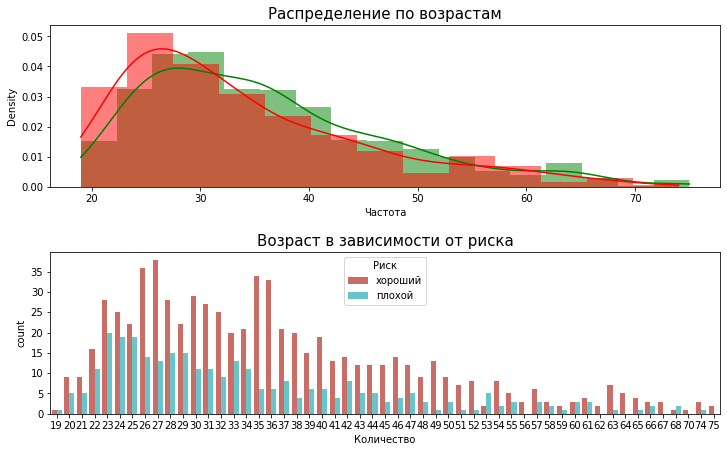

In [98]:
df_good = df_credit[df_credit["Риск"] == 'хороший']
df_bad = df_credit[df_credit["Риск"] == 'плохой']

#plt.subplots() - это функция, которая возвращает кортеж, содержащий объект фигуры и осей
fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.histplot(df_good["Возраст"], ax=ax[0], color="g", kde=True, stat="density", linewidth=0)
g1 = sns.histplot(df_bad["Возраст"], ax=ax[0], color="r",  kde=True, stat="density", linewidth=0)

'''
g1 = sns.distplot(df_good["Возраст"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Возраст"], ax=ax[0], 
             color='r')
'''
g1.set_title("Распределение по возрастам", fontsize=15)
g1.set_xlabel("Возраст")
g1.set_xlabel("Частота")

g2 = sns.countplot(x="Возраст",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Риск")
g2.set_title("Возраст в зависимости от риска", fontsize=15)
g2.set_xlabel("Возраст")
g2.set_xlabel("Количество")
plt.show()

<h2>Создание категориальной переменной для обработки с помощью переменной Age </h2>

In [99]:
#Создание столбца Возрастная_категория
interval = (18, 25, 35, 60, 120)

cats = ['Студенты', 'Молодые', 'Взрослые', 'Пожилые']
df_credit["Возрастная_категория"] = pd.cut(df_credit.Возраст, interval, labels=cats)


df_good = df_credit[df_credit["Риск"] == 'хороший']
df_bad = df_credit[df_credit["Риск"] == 'плохой']

In [100]:
trace0 = go.Box(
    y=df_good["Сумма кредита"],
    x=df_good["Возрастная_категория"],
    name='Хороший кредитный рейтинг',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Сумма кредита'],
    x=df_bad['Возрастная_категория'],
    name='Плохой кредитный рейтинг',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Размер кредита (Доллары США)',
        zeroline=False
    ),
    xaxis=dict(
        title='Возрастная категория'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=1000,
    height = 700,)

fig.show(renderer='colab')
#py.iplot(fig, filename='box-age-cat')

Получилось интересное распределение

<h2>Посмотрим на распределение жилищных условий в зависимости от степени риска</h2>


In [101]:
#Первый график
trace0 = go.Bar(
    x = df_credit[df_credit["Риск"]== 'хороший']["Жилищные условия"].value_counts().index.values,
    y = df_credit[df_credit["Риск"]== 'хороший']["Жилищные условия"].value_counts().values,
    name='Хороший кредитный рейтинг'
)

#Второй график
trace1 = go.Bar(
    x = df_credit[df_credit["Риск"]== 'плохой']["Жилищные условия"].value_counts().index.values,
    y = df_credit[df_credit["Риск"]== 'плохой']["Жилищные условия"].value_counts().values,
    name="Плохой кредитный рейтинг"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Распределение уровня риска по жилищным условиям'
)


fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    autosize=False,
    width=800,
    height=700,)

fig.show(renderer='colab')
#py.iplot(fig, filename='Housing-Grouped')

Мы видим, что наличие жилищной собственности и хороший рейтинг клиента взаимосвязаны

<h3> Распределение размера кредита в зависимости от жилищных условий</h3>

In [102]:
#violin - статистическое представление числовых данных. Этот вид диаграмм похож на коробчатую диаграмму с повернутой диаграммой плотности ядра с обоих сторон.
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Жилищные условия'],
            "y": df_good['Сумма кредита'],
            "legendgroup": 'Хороший кредитный рейтинг',
            "scalegroup": 'No',
            "name": 'Хороший кредитный рейтинг',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Жилищные условия'],
            "y": df_bad['Сумма кредита'],
            "legendgroup": 'Плохой кредитный рейтинг',
            "scalegroup": 'No',
            "name": 'Плохой кредитный рейтинг',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}

fig = go.Figure(fig)
fig.show(renderer='colab')

#py.iplot(fig, filename = 'violin/split', validate = False)

Интересный результат! Наибольшие значения размера кредита располагаются в категории "Бесплатное жилье", также имеется большое колебание по уровню риска

<h2>Посмотрим на распределение по полу</h2>

In [103]:
#Первый график
trace0 = go.Bar(
    x = df_credit[df_credit["Риск"]== 'хороший']["Пол"].value_counts().index.values,
    y = df_credit[df_credit["Риск"]== 'хороший']["Пол"].value_counts().values,
    name='Хороший кредитный рейтинг'
)

#Первый график 2
trace1 = go.Bar(
    x = df_credit[df_credit["Риск"]== 'плохой']["Пол"].value_counts().index.values,
    y = df_credit[df_credit["Риск"]== 'плохой']["Пол"].value_counts().values,
    name="Плохой кредитный рейтинг"
)

#Второй график
trace2 = go.Box(
    x = df_credit[df_credit["Риск"]== 'хороший']["Пол"],
    y = df_credit[df_credit["Риск"]== 'хороший']["Сумма кредита"],
    name=trace0.name
)

#Второй график 2
trace3 = go.Box(
    x = df_credit[df_credit["Риск"]== 'плохой']["Пол"],
    y = df_credit[df_credit["Риск"]== 'плохой']["Сумма кредита"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Количество клиентов разных полов', 'Размер кредита в зависимости от пола клиента'),  horizontal_spacing=0.5)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)


fig['layout'].update(height=400, width=1000, title='Распределение по полу', boxmode='group')

fig.update_layout(margin=dict(l=80, r=0, t=100, b=100))

fig.show(renderer='colab')
#py.iplot(fig, filename='sex-subplot')

Я разделю данные на возрастные категории и посмотрю распределение размера кредита в зависимости от кредитного риска


Исследование по месту работы
- Распределение
- Пересечение по размеру кредита
- Пересечение по возрасту

In [104]:
#Первый график
trace0 = go.Bar(
    x = df_credit[df_credit["Риск"]== 'хороший']["Место работы"].value_counts().index.values,
    y = df_credit[df_credit["Риск"]== 'хороший']["Место работы"].value_counts().values,
    name='Распределние хорошего кредитного рейтинга'
)

#Второй график
trace1 = go.Bar(
    x = df_credit[df_credit["Риск"]== 'плохой']["Место работы"].value_counts().index.values,
    y = df_credit[df_credit["Риск"]== 'плохой']["Место работы"].value_counts().values,
    name="Распределение плохого кредитного рейтинга"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Распределение мест работы'
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=900,
    height=700,)

fig.show(renderer='colab')
#py.iplot(fig, filename='grouped-bar')

In [105]:
trace0 = go.Box(
    x=df_good["Место работы"],
    y=df_good["Сумма кредита"],
    name='Хороший кредитный рейтинг'
)

trace1 = go.Box(
    x=df_bad['Место работы'],
    y=df_bad['Сумма кредита'],
    name='Плохой кредитный рейтинг'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Распределение размера кредита в зависимости от места работы'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')
#py.iplot(fig, filename='box-age-cat')

In [106]:

fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Место работы'],
            "y": df_good['Возраст'],
            "legendgroup": 'Хороший кредитный рейтинг',
            "scalegroup": 'No',
            "name": 'Хороший кредитный рейтинг',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Место работы'],
            "y": df_bad['Возраст'],
            "legendgroup": 'Плохой кредитный рейтинг',
            "scalegroup": 'No',
            "name": 'Плохой кредитный рейтинг',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}

fig = go.Figure(fig)
fig.show(renderer='colab')
#py.iplot(fig, filename = 'Age-Housing', validate = False)

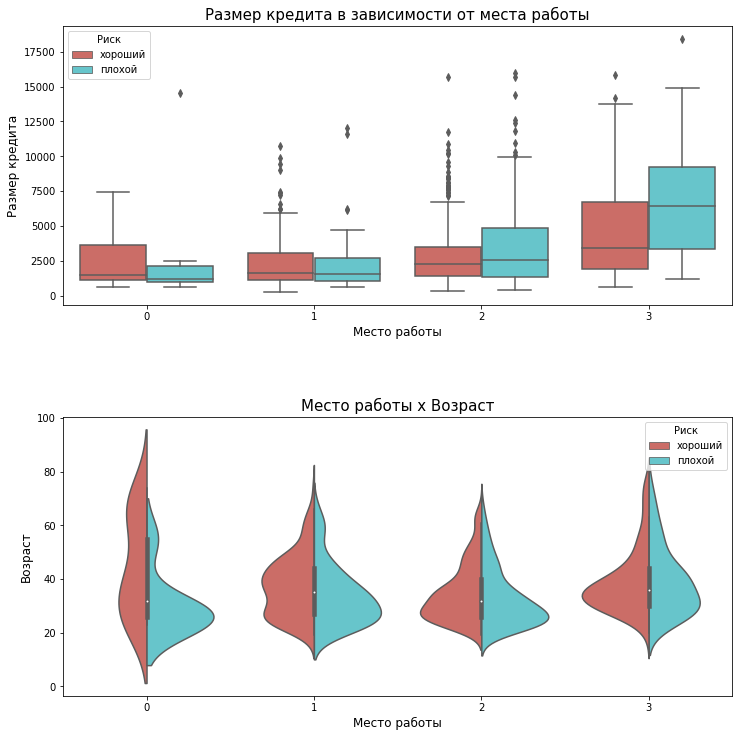

In [108]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Место работы", y="Сумма кредита", data=df_credit, 
            palette="hls", ax=ax[0], hue="Риск")
g1.set_title("Размер кредита в зависимости от места работы", fontsize=15)
g1.set_xlabel("Место работы", fontsize=12)
g1.set_ylabel("Размер кредита", fontsize=12)

g2 = sns.violinplot(x="Место работы", y="Возраст", data=df_credit, ax=ax[1],  
               hue="Риск", split=True, palette="hls")
g2.set_title("Место работы x Возраст", fontsize=15)
g2.set_xlabel("Место работы", fontsize=12)
g2.set_ylabel("Возраст", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Посмотрим на распределение по размеру кредита

In [107]:
#!pip uninstall tornado
#!pip install tornado==4.5.3

import plotly.figure_factory as ff

import numpy as np

# Добавить данные гистограммы
x1 = np.log(df_good['Сумма кредита']) 
x2 = np.log(df_bad["Сумма кредита"])

# Сгруппировать данные
hist_data = [x1, x2]

group_labels = ['Хороший кредитный рейтинг', 'Плохой кредитный рейтинг']

# Создать distplot с настраиваемым bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

fig.show(renderer='colab')
#py.iplot(fig, filename='Distplot with Multiple Datasets')

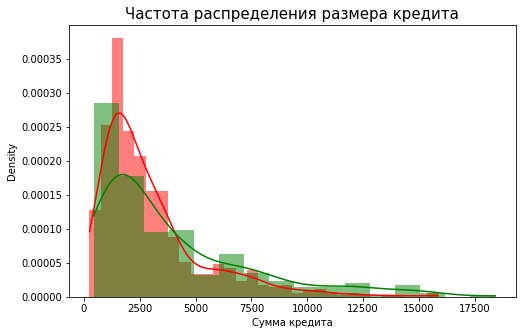

In [109]:
#Доюавление датафреймов good и bad в диаграмме
plt.figure(figsize = (8,5))

g = sns.histplot(df_good['Сумма кредита'], color="r", kde=True, stat="density", linewidth=0)
g = sns.histplot(df_bad["Сумма кредита"], color="g", kde=True, stat="density", linewidth=0)


'''
g= sns.distplot(df_good['Сумма кредита'], color='r')
g = sns.distplot(df_bad["Сумма кредита"], color='g')
'''

g.set_title("Частота распределения размера кредита", fontsize=15)
plt.show()

Распределение размера сберегательных счетов в зависимости от кредитного рейтинга

In [110]:
from plotly import subplots
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Сберегательные счета"].value_counts().index.values,
    y = df_good["Сберегательные счета"].value_counts().values,
    name='Хороший кредитный рейтинг'
)
count_bad = go.Bar(
    x = df_bad["Сберегательные счета"].value_counts().index.values,
    y = df_bad["Сберегательные счета"].value_counts().values,
    name='Плохой кредитный рейтинг'
)


box_1 = go.Box(
    x=df_good["Сберегательные счета"],
    y=df_good["Сумма кредита"],
    name='Хороший кредитный рейтинг'
)
box_2 = go.Box(
    x=df_bad["Сберегательные счета"],
    y=df_bad["Сумма кредита"],
    name='Плохой кредитный рейтинг'
)

scat_1 = go.Box(
    x=df_good["Сберегательные счета"],
    y=df_good["Возраст"],
    name='Хороший кредитный рейтинг'
)
scat_2 = go.Box(
    x=df_bad["Сберегательные счета"],
    y=df_bad["Возраст"],
    name='Плохой кредитный рейтинг'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = subplots.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Количество сбер. счетов','Размер кредита в зависимости от сбер. счета', 
                                          'Возраст в зависимости от размера сберегательного счета'), horizontal_spacing=0.3)

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Сберегательные счета', boxmode='group')

fig.update_layout(margin=dict(l=1, r=1, t=100, b=0))

fig.show(renderer='colab')

#py.iplot(fig, filename='combined-savings')


Описание распределения сберегательных счетов в зависимости от риска:  
Риск                  плохой  хороший
Сберегательные счета                 
большой                    6       42
маленький                217      386
очень большой             11       52
средний                   34       69


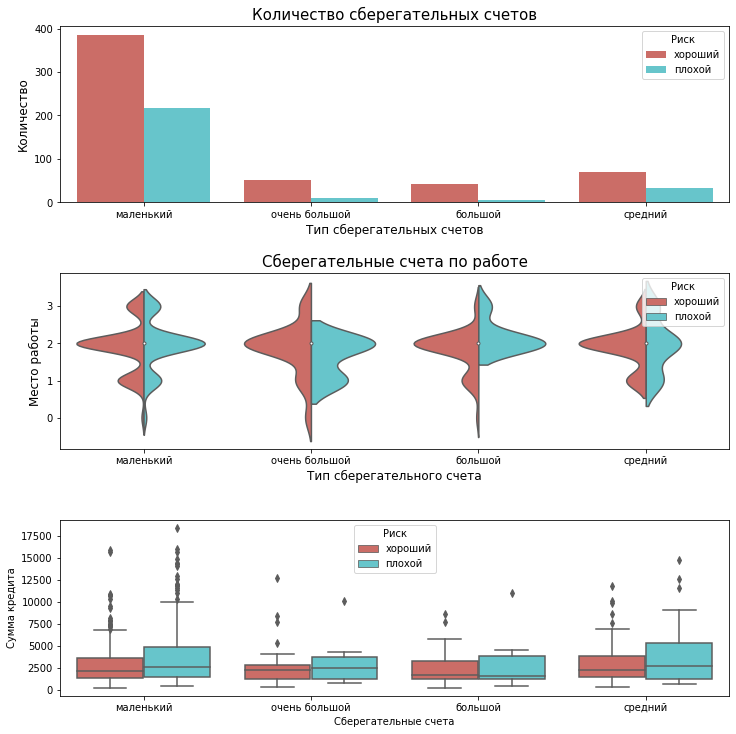

In [111]:
print("Описание распределения сберегательных счетов в зависимости от риска:  ")
print(pd.crosstab(df_credit["Сберегательные счета"],df_credit.Риск))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Сберегательные счета", data=df_credit, palette="hls", 
              ax=ax[0],hue="Риск")
g.set_title("Количество сберегательных счетов", fontsize=15)
g.set_xlabel("Тип сберегательных счетов", fontsize=12)
g.set_ylabel("Количество", fontsize=12)

g1 = sns.violinplot(x="Сберегательные счета", y="Место работы", data=df_credit, palette="hls", 
               hue = "Риск", ax=ax[1],split=True)
g1.set_title("Сберегательные счета по работе", fontsize=15)
g1.set_xlabel("Тип сберегательного счета", fontsize=12)
g1.set_ylabel("Место работы", fontsize=12)

g = sns.boxplot(x="Сберегательные счета", y="Сумма кредита", data=df_credit, ax=ax[2],
            hue = "Риск",palette="hls")
g2.set_title("Сберегательные счета по размеру кредита", fontsize=15)
g2.set_xlabel("Тип сберегательного счета", fontsize=12)
g2.set_ylabel("Сумма кредита(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Красивое и интеренсное распределение...

Values describe: 
Риск                 плохой  хороший
Цель                                
бизнесс                  34       63
бытовая техника           4        8
машина                  106      231
мебель/оборудование      58      123
образование              23       36
отпуск/другое             5        7
радио/TV                 62      218
ремонт                    8       14


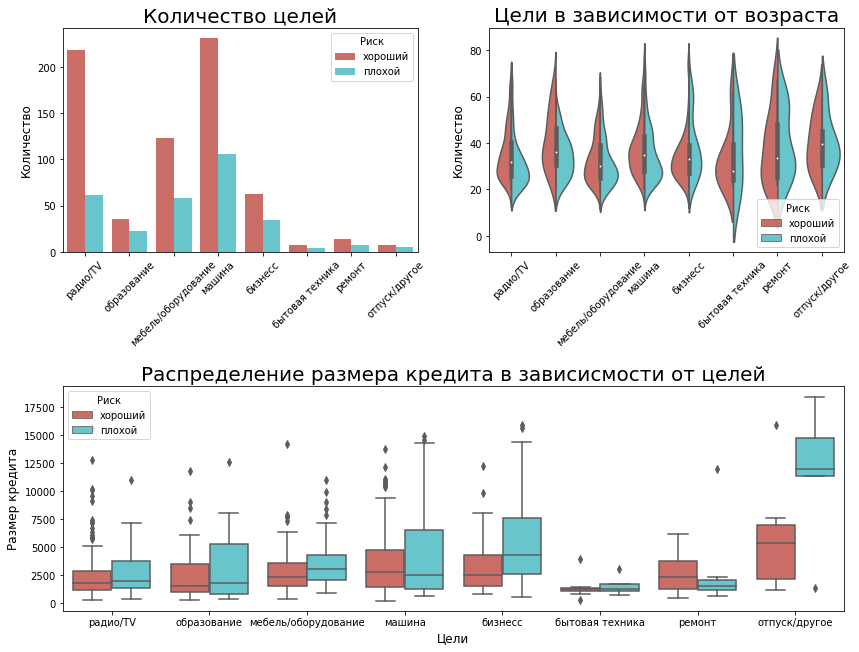

In [112]:
print("Values describe: ")
print(pd.crosstab(df_credit.Цель, df_credit.Риск))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Цель", data=df_credit, 
              palette="hls", hue = "Риск")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Количество", fontsize=12)
g.set_title("Количество целей", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Цель", y="Возраст", data=df_credit, 
                    palette="hls", hue = "Риск",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Количество", fontsize=12)
g1.set_title("Цели в зависимости от возраста", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Цель", y="Сумма кредита", data=df_credit, 
               palette="hls", hue = "Риск")
g2.set_xlabel("Цели", fontsize=12)
g2.set_ylabel("Размер кредита", fontsize=12)
g2.set_title("Распределение размера кредита в зависисмости от целей", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Срок заема

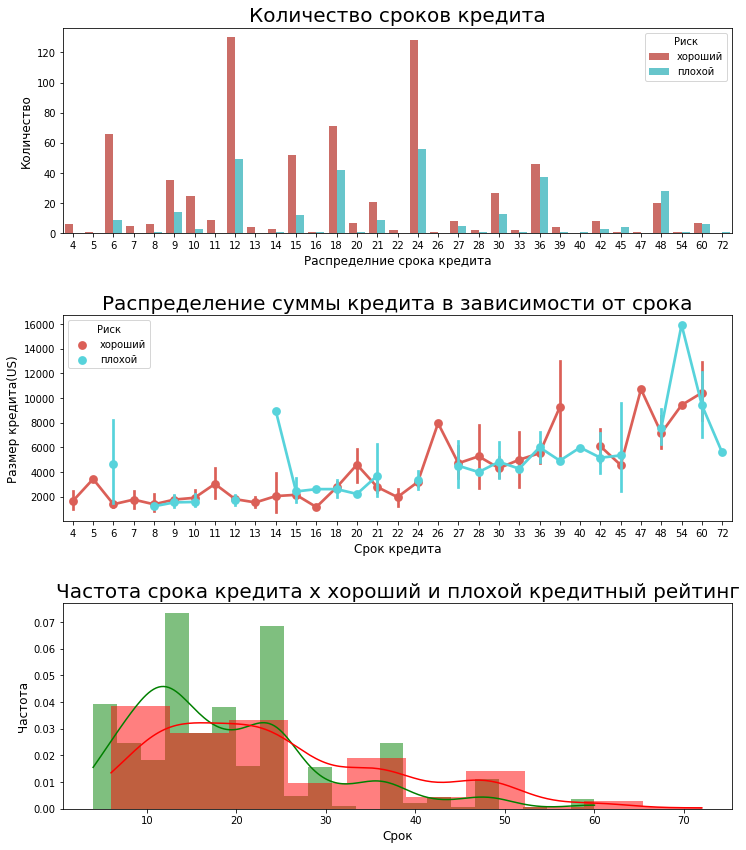

In [113]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Срок кредита", data=df_credit, 
              palette="hls",  hue = "Риск")
g.set_xlabel("Распределние срока кредита", fontsize=12)
g.set_ylabel("Количество", fontsize=12)
g.set_title("Количество сроков кредита", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Срок кредита", y ="Сумма кредита",data=df_credit,
                   hue="Риск", palette="hls")
g1.set_xlabel("Срок кредита", fontsize=12)
g1.set_ylabel("Размер кредита(US)", fontsize=12)
g1.set_title("Распределение суммы кредита в зависимости от срока", fontsize=20)

g2 = plt.subplot(313)


'''
g2 = sns.distplot(df_good["Срок кредита"], color='g')
g2 = sns.distplot(df_bad["Срок кредита"], color='r')
'''
g2 = sns.histplot(df_good['Срок кредита'], color="g", kde=True, stat="density", linewidth=0)
g2 = sns.histplot(df_bad['Срок кредита'], color="r", kde=True, stat="density", linewidth=0)

g2.set_xlabel("Срок", fontsize=12)
g2.set_ylabel("Частота", fontsize=12)
g2.set_title("Частота срока кредита x хороший и плохой кредитный рейтинг", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

Интересно, наибольшая сумма кредита была взята на самый долгий срок. <br>
Наибольшая плотность распределения находится между [12 ~ 18 ~ 24] месяцами. <br>


<h2>Обычные счета</h2>

Для начала посмотрим на распределение

In [114]:
#Первый график
trace0 = go.Bar(
    x = df_credit[df_credit["Риск"]== 'хороший']["Обычные счета"].value_counts().index.values,
    y = df_credit[df_credit["Риск"]== 'хороший']["Обычные счета"].value_counts().values,
    name='Распределение хорошего кредитного рейтинга' 
    
)

#Второй график
trace1 = go.Bar(
    x = df_credit[df_credit["Риск"]== 'плохой']["Обычные счета"].value_counts().index.values,
    y = df_credit[df_credit["Риск"]== 'плохой']["Обычные счета"].value_counts().values,
    name="Распределение плохого кредитного рейтинга"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Распределение обычных счетов',
    xaxis=dict(title='Название обычного счета'),
    yaxis=dict(title='Количество'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=700,
    height=700,)

fig.show(renderer='colab')
#py.iplot(fig, filename = 'Age-ba', validate = False)

Проверим значения обычных счетов

In [115]:
df_good = df_credit[df_credit["Риск"] == 'хороший']
df_bad = df_credit[df_credit["Риск"] == 'плохой']

trace0 = go.Box(
    y=df_good["Сумма кредита"],
    x=df_good["Обычные счета"],
    name='Хороший кредитный рейтинг',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Сумма кредита'],
    x=df_bad['Обычные счета'],
    name='Плохой кредитный рейтинг',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Распределение счетов'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,)

fig.show(renderer='colab')

#py.iplot(fig, filename='box-age-cat')

Старый график заменим новым интерактивным графиком

Total values of the most missing variable: 
Обычные счета
большой       63
маленький    274
средний      269
Name: Обычные счета, dtype: int64


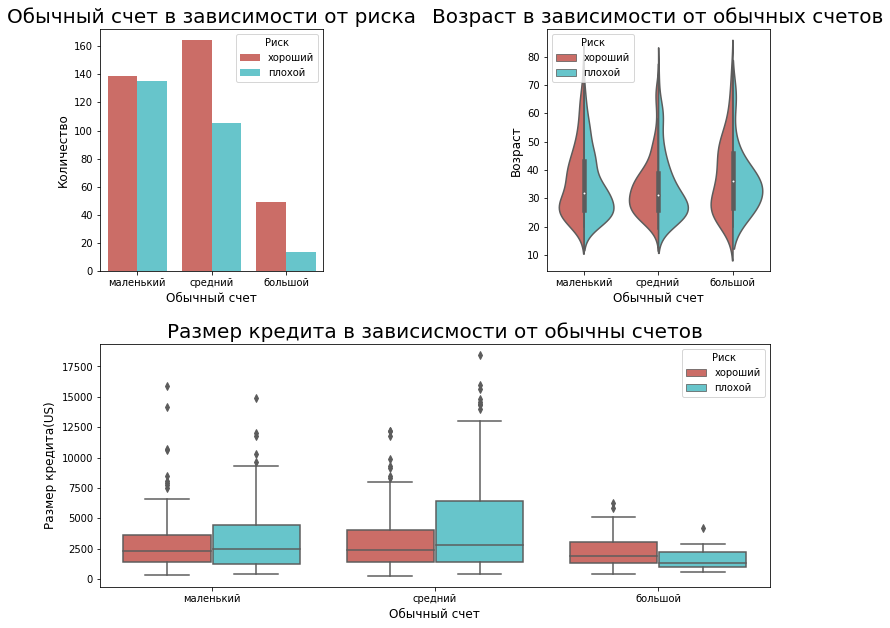

In [116]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Обычные счета")["Обычные счета"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Обычные счета", data=df_credit, 
              palette="hls", hue="Риск")
g.set_xlabel("Обычный счет", fontsize=12)
g.set_ylabel("Количество", fontsize=12)
g.set_title("Обычный счет в зависимости от риска", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Обычные счета", y="Возраст", data=df_credit, palette="hls", hue = "Риск",split=True)
g1.set_xlabel("Обычный счет", fontsize=12)
g1.set_ylabel("Возраст", fontsize=12)
g1.set_title("Возраст в зависимости от обычных счетов", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Обычные счета",y="Сумма кредита", data=df_credit,hue='Риск',palette="hls")
g2.set_xlabel("Обычный счет", fontsize=12)
g2.set_ylabel("Размер кредита(US)", fontsize=12)
g2.set_title("Размер кредита в зависисмости от обычны счетов", fontsize=20)

plt.subplots_adjust(wspace = 1, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

Перекрестная таблица для более глубокого исследования данных

In [117]:
pd.crosstab(df_credit.Пол, df_credit['Место работы'])

Место работы,0,1,2,3
Пол,,,,
женский,12,64,197,37
мужской,10,136,433,111


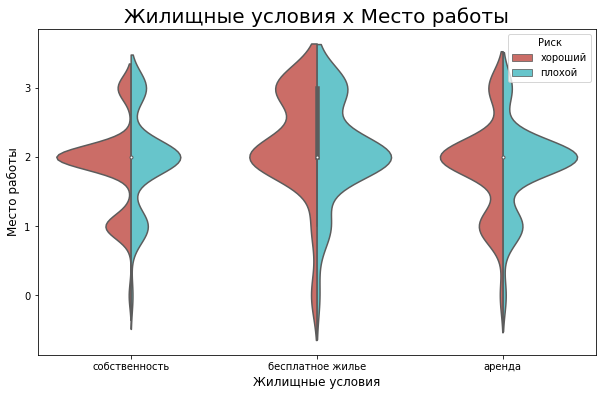

In [118]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Жилищные условия",y="Место работы",data=df_credit,
                   hue="Риск", palette="hls",split=True)
g.set_xlabel("Жилищные условия", fontsize=12)
g.set_ylabel("Место работы", fontsize=12)
g.set_title("Жилищные условия x Место работы", fontsize=20)

plt.show()

In [119]:
print(pd.crosstab(df_credit["Обычные счета"],df_credit.Пол))

Пол            женский  мужской
Обычные счета                  
большой             20       43
маленький           88      186
средний             86      183


In [120]:
date_int = ["Цель", 'Пол']

#sns.light_palette - создание последовательной палитры, которая смешивает цвета от светлого до цветного.
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Пол,женский,мужской
Цель,,
бизнесс,19,78
бытовая техника,6,6
машина,94,243
мебель/оборудование,74,107
образование,24,35
отпуск/другое,3,9
радио/TV,85,195
ремонт,5,17


## Посмотрим общее значение в каждой категории

In [121]:
df_credit

,Возраст,Пол,Место работы,Жилищные условия,Сберегательные счета,Обычные счета,Сумма кредита,Срок кредита,Цель,Риск,Возрастная_категория
0,67,мужской,2,собственность,NaN,маленький,1169,6,радио/TV,хороший,Пожилые
1,22,женский,2,собственность,маленький,средний,5951,48,радио/TV,плохой,Студенты
2,49,мужской,1,собственность,маленький,NaN,2096,12,образование,хороший,Взрослые
3,45,мужской,2,бесплатное жилье,маленький,маленький,7882,42,мебель/оборудование,хороший,Взрослые
4,53,мужской,2,бесплатное жилье,маленький,маленький,4870,24,машина,плохой,Взрослые
...,...,...,...,...,...,...,...,...,...,...,...
995,31,женский,1,собственность,маленький,NaN,1736,12,мебель/оборудование,хороший,Молодые
996,40,мужской,3,собственность,маленький,маленький,3857,30,машина,хороший,Взрослые
997,38,мужской,2,собственность,маленький,NaN,804,12,радио/TV,хороший,Взрослые
998,23,мужской,2,бесплатное жилье,маленький,маленький,1845,45,радио/TV,плохой,Студенты


In [122]:
print("Цель : ",df_credit.Цель.unique())
print("Пол : ",df_credit.Пол.unique())
print("Имущество : ",df_credit['Жилищные условия'].unique())
print("Сберегательные счета : ",df_credit['Сберегательные счета'].unique())
print("Риск : ",df_credit['Риск'].unique())
print("Обычные счета : ",df_credit['Обычные счета'].unique())
print("Возрастная категория : ",df_credit['Возрастная_категория'].unique())

Цель :  ['радио/TV' 'образование' 'мебель/оборудование' 'машина' 'бизнесс'
 'бытовая техника' 'ремонт' 'отпуск/другое']
Пол :  ['мужской' 'женский']
Имущество :  ['собственность' 'бесплатное жилье' 'аренда']
Сберегательные счета :  [nan 'маленький' 'очень большой' 'большой' 'средний']
Риск :  ['хороший' 'плохой']
Обычные счета :  ['маленький' 'средний' nan 'большой']
Возрастная категория :  ['Пожилые', 'Студенты', 'Взрослые', 'Молодые']
Categories (4, object): ['Студенты' < 'Молодые' < 'Взрослые' < 'Пожилые']


## Сделаем некоторые расчеты по этим значениям и создадим переменную Dummies

In [123]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

## Трансформация данных в Dummy

In [124]:
df_credit['Сберегательные счета'] = df_credit['Сберегательные счета'].fillna('no_inf')
df_credit['Обычные счета'] = df_credit['Обычные счета'].fillna('no_inf')

#Перезаписывание переменных
df_credit = df_credit.merge(pd.get_dummies(df_credit.Цель, drop_first=True, prefix='Цель'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Пол, drop_first=True, prefix='Пол'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit['Жилищные условия'], drop_first=True, prefix='Жилищные'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Сберегательные счета"], drop_first=True, prefix='Сберегательные'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Риск, prefix='Риск'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Обычные счета"], drop_first=True, prefix='Обычные'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Возрастная_категория"], drop_first=True, prefix='Возрастная_категория'), left_index=True, right_index=True)

# Удалаяем старые категории

In [125]:
#Исключение пропущенных столбцов

del df_credit["Сберегательные счета"]
del df_credit["Обычные счета"]
del df_credit["Цель"]
del df_credit["Пол"]
del df_credit["Жилищные условия"]
del df_credit["Возрастная_категория"]
del df_credit["Риск"]
del df_credit['Риск_хороший']

In [126]:
df_credit

,Возраст,Место работы,Сумма кредита,Срок кредита,Цель_бытовая техника,Цель_машина,Цель_мебель/оборудование,Цель_образование,Цель_отпуск/другое,Цель_радио/TV,Цель_ремонт,Пол_мужской,Жилищные_бесплатное жилье,Жилищные_собственность,Сберегательные_большой,Сберегательные_маленький,Сберегательные_очень большой,Сберегательные_средний,Риск_плохой,Обычные_большой,Обычные_маленький,Обычные_средний,Возрастная_категория_Молодые,Возрастная_категория_Взрослые,Возрастная_категория_Пожилые
0,67,2,1169,6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,22,2,5951,48,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,49,1,2096,12,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
3,45,2,7882,42,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0
4,53,2,4870,24,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
996,40,3,3857,30,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
997,38,2,804,12,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
998,23,2,1845,45,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0


# **5. Корреляция:** <a id="Correlation"></a> <br>
- Посмотрим на корреляцию данных 
<h1>Посмотрим на корреляцию данных

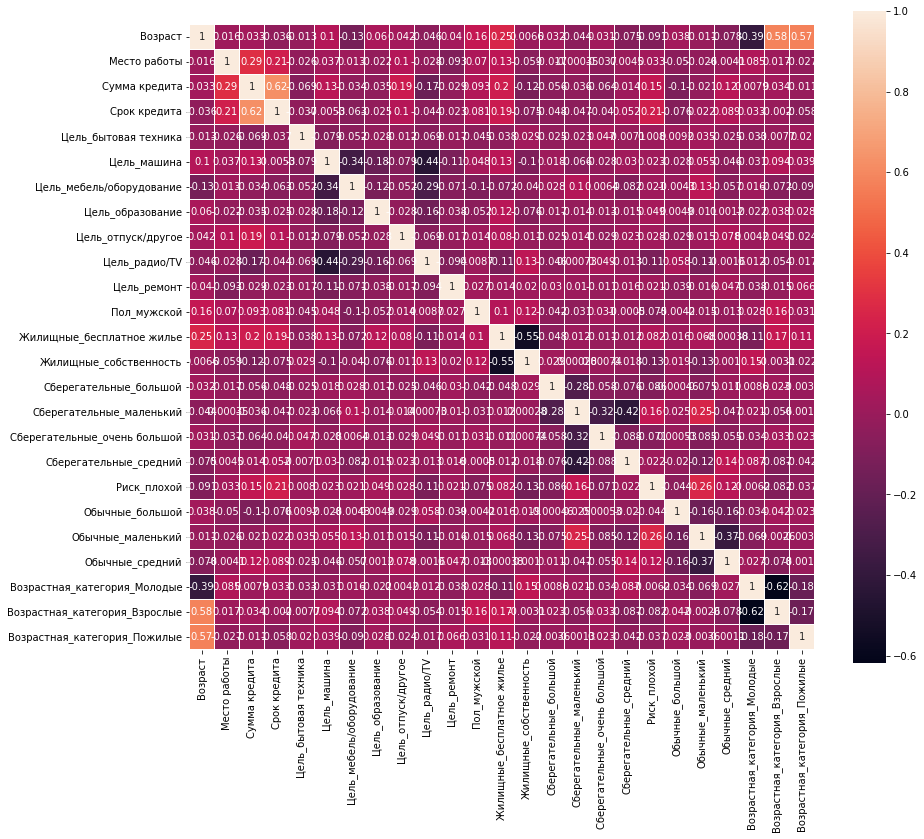

In [127]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

# **6. Предварительная обработка:** <a id="Preprocessing"></a> <br>
- Импорт библиотек машинного обучения
- Задаем переменные X и Y для предсказания
- Разделение *данных*


In [128]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #Для оценки модели

from sklearn.model_selection import GridSearchCV

# Модели алгоритмов для сравнения
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [129]:
df_credit['Сумма кредита'] = np.log(df_credit['Сумма кредита'])

In [130]:
#Создание переменных X и Y
X = df_credit.drop('Риск_плохой', 1).values
y = df_credit["Риск_плохой"].values

# Разделение X и y на две версии: для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

LR: 0.409168 (0.071636)
LDA: 0.424515 (0.085843)
KNN: 0.251490 (0.085541)
CART: 0.444116 (0.106387)
NB: 0.599074 (0.100815)
RF: 0.369054 (0.086184)
SVM: 0.140285 (0.048598)
XGB: 0.376196 (0.113131)


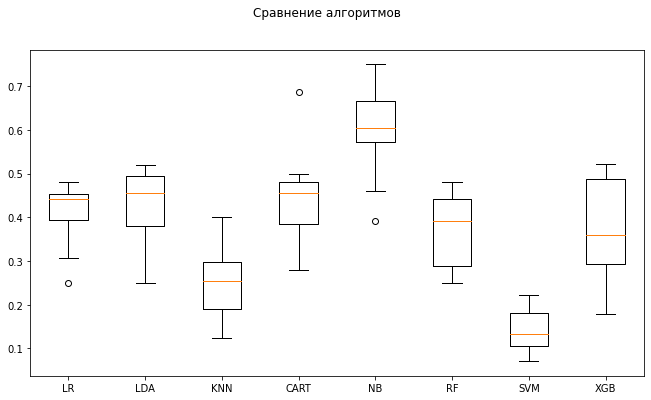

In [131]:
# seed - для сохранения значений
seed = 7

# Подготовка моделей
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# Оценка каждой модели
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# График сравнения алгоритмов
fig = plt.figure(figsize=(11,6))
fig.suptitle('Сравнение алгоритмов')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Очень интересно. Почти все модели показывают низкое значение результата. 
Мы можем видеть, что лучшие результат получены с CART, NB, и XGBoost.
Я выполню некоторые модели и постараюсь исправить их <br> 

# **7.1 Модель 1:** <a id="Modelling 1"></a> <br>
- Использование Случайного Леса для предсказания кредитного рейтинга
- Некоторые Параметры Валидации

Достоинства случайного леса:
- Способность эффективно обрабатывать данные с большим числом признаков и классов.
- Нечувствительность к масштабированию (и вообще к любым монотонным преобразованиям) значений признаков.
- Одинаково хорошо обрабатываются как непрерывные, так и дискретные признаки. 
- Существуют методы построения деревьев по данным с пропущенными значениями признаков.
- Существуют методы оценивания значимости отдельных признаков в модели.
- Внутренняя оценка способности модели к обобщению (тест по неотобранным образцам).
- Высокая параллелизуемость и масштабируемость.

In [132]:
#Создание гиперпараметров
param_grid = {"max_depth": [3, 5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Создание классификатора
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.111, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.178, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.217, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.217, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.174, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.111, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.000, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.089, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.000, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.067, total=   0.1s
[CV] max_depth=3, max

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   51.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [133]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.44260869565217387
{'max_depth': 10, 'max_features': 20, 'n_estimators': 25}


In [134]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#Обучение с наилучшими параметрами
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [135]:
#Тестирование модели
#Предсказание с помощью модели
y_pred = rf.predict(X_test)

# Проверка результатов
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.732


[[153  25]
 [ 42  30]]


0.43731778425655976


Очень плохие результаты!

# **7.2 Модель 2:** <a id="Modelling 2"></a> <br>

In [136]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

Наи́вный ба́йесовский классифика́тор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно. Во многих практических приложениях для оценки параметров для наивных байесовых моделей используют метод максимального правдоподобия; другими словами, можно работать с наивной байесовской моделью, не веря в байесовскую вероятность и не используя байесовские методы.

Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

In [137]:
# Создание классификатора
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [138]:
# Вывод результатов обучения
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.704


In [139]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.628


[[126  52]
 [ 41  31]]


              precision    recall  f1-score   support

           0       0.75      0.71      0.73       178
           1       0.37      0.43      0.40        72

    accuracy                           0.63       250
   macro avg       0.56      0.57      0.57       250
weighted avg       0.64      0.63      0.64       250



# C помощью модели Гаусса мы получили лучший ответ.

## Проверим кривую ROC

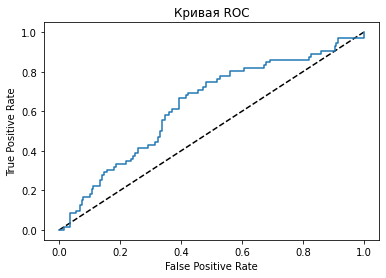

In [140]:
#Предсказание
y_pred_prob = model.predict_proba(X_test)[:,1]

# Создание значений кривой ROC: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# График кривой ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Кривая ROC')
plt.show()

In [141]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [142]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# Создание пайплайна
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# Оценка пайплайна
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.72


In [143]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.688


[[144  34]
 [ 44  28]]


0.39999999999999997


Выполнение пайплайна модели



In [144]:
#Создание гиперпараметров
#В машинном обучении гиперпараметрами называют параметры алгоритмов, значения которых устанавливаются перед запуском процесса обучения.
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Создание классификатора
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=2, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],

In [145]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.75,
 'gamma': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'subsample': 0.75}

In [146]:
y_pred = grid_search.predict(X_test)

# Проверка полученных результатов
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.772


[[161  17]
 [ 40  32]]


# Задания

1) Определить, выдадут кредит вам и каким-нибудь вашим знакомым. Для этого необходимо создать данные по нескольким людям и отправить их модели машинного обучения по образу того, как это делается в лекции.

2) Найдите все необходимые данные по среднестатистическому россиянину. Определите, выдадут ли ему кредит?

3) На какие цели мужчины хотят больше всего взять кредит?

4) На какие цели им больше всего не дают кредитов?

5) Определите характеристики лучшего и худшего человека для кредита, то есть того, кому 100% дадут и не дадут кредит.

6) У кого больше всего денег в банке? Постройте графики распределения по полу и возрасту. На что они хотят взять кредит, на какую сумму? Какие цели самых бедных людей?

In [147]:
#1) Определить, выдадут кредит вам и каким-нибудь вашим знакомым. Для этого необходимо создать данные по нескольким людям и отправить их модели машинного обучения по образу того, как это делается в лекции.

people = {'Возраст': [24, 25], 'Место работы': [3, 3], 'Сумма кредита': [1000, 1000], 'Срок кредита': [12, 12], 'Цель_бытовая техника': [0, 0], 'Цель_машина': [1, 1], 'Цель_мебель/оборудование': [0, 0], 'Цель_образование': [0, 0], 'Цель_отпуск/другое': [0, 0], 'Цель_радио/TV': [0, 0], 'Цель_ремонт': [0, 0], 'Пол_мужской': [0, 1], 'Жилищные_бесплатное жилье': [0, 0], 'Жилищные_собственность': [1, 1], 'Сберегательные_большой': [0, 0], 'Сберегательные_маленький': [1, 0], 'Сберегательные_очень большой': [0, 0], 'Сберегательные_средний': [0, 1], 'Обычные_большой': [0, 0], 'Обычные_маленький': [0, 0], 'Обычные_средний': [1, 1], 'Возрастная_категория_Молодые': [1, 1], 'Возрастная_категория_Взрослые': [0, 0], 'Возрастная_категория_Пожилые': [0, 0]}

people_df = pd.DataFrame(people)

model.predict(people_df)

array([1, 0], dtype=uint8)

In [148]:
#2) Найдите все необходимые данные по среднестатистическому россиянину. Определите, выдадут ли ему кредит?

#https://journal.tinkoff.ru/citizen/
#https://ria.ru/20211020/kredity-1755313054.html

people = {'Возраст': [40], 'Место работы': [2], 'Сумма кредита': [1000], 'Срок кредита': [12], 'Цель_бытовая техника': [0], 'Цель_машина': [1], 'Цель_мебель/оборудование': [0], 'Цель_образование': [0], 'Цель_отпуск/другое': [0], 'Цель_радио/TV': [0], 'Цель_ремонт': [0], 'Пол_мужской': [1], 'Жилищные_бесплатное жилье': [0], 'Жилищные_собственность': [1], 'Сберегательные_большой': [0], 'Сберегательные_маленький': [1], 'Сберегательные_очень большой': [0], 'Сберегательные_средний': [0], 'Обычные_большой': [0], 'Обычные_маленький': [0], 'Обычные_средний': [1], 'Возрастная_категория_Молодые': [0], 'Возрастная_категория_Взрослые': [1], 'Возрастная_категория_Пожилые': [0]}

people_df = pd.DataFrame(people)

model.predict(people_df)

array([0], dtype=uint8)

Среднестатистическому россиянину  могут дать кредит

In [149]:
#3) На какие цели мужчины хотят больше всего взять кредит?

df_credit = pd.read_csv("german_credit_data1.csv",index_col=0)

#Замена заголовков на русские значения
df_credit.rename(columns={'Age': 'Возраст', 'Job': 'Место работы', 'Sex': 'Пол','Housing': 'Жилищные условия','Saving accounts': 'Сберегательные счета','Checking account': 'Обычные счета', 'Credit amount': 'Сумма кредита', 'Duration': 'Срок кредита', 'Purpose': 'Цель', 'Risk': 'Риск'}, inplace=True)
#Замена значений на русские слова
df_credit.replace('male', 'мужской', inplace=True)
df_credit.replace('female', 'женский', inplace=True)
df_credit.replace('own', 'собственность', inplace=True)
df_credit.replace('rent', 'аренда', inplace=True)
df_credit.replace('free', 'бесплатное жилье', inplace=True)
df_credit.replace('radio/TV', 'радио/TV', inplace=True)
df_credit.replace('education', 'образование', inplace=True)
df_credit.replace('furniture/equipment', 'мебель/оборудование', inplace=True)
df_credit.replace('car', 'машина', inplace=True)
df_credit.replace('business', 'бизнесс', inplace=True)
df_credit.replace('repairs', 'ремонт', inplace=True)
df_credit.replace('domestic appliances', 'бытовая техника', inplace=True)
df_credit.replace('vacation/others', 'отпуск/другое', inplace=True)
df_credit.replace('good', 'хороший', inplace=True)
df_credit.replace('bad', 'плохой', inplace=True)
df_credit.replace('little', 'маленький', inplace=True)
df_credit.replace('moderate', 'средний', inplace=True)
df_credit.replace('rich', 'большой', inplace=True)
df_credit.replace('quite rich', 'очень большой', inplace=True)


trace0 = go.Bar(
            x = df_credit[(df_credit["Пол"]== 'мужской') & (df_credit["Риск"]== 'хороший')]["Цель"].value_counts().index.values,
            y = df_credit[(df_credit["Пол"]== 'мужской') & (df_credit["Риск"]== 'хороший')]["Цель"].value_counts().values,
            name = "Хороший кредитный рейтинг"
    )

trace1 = go.Bar(
            x = df_credit[(df_credit["Пол"]== 'мужской') & (df_credit["Риск"]== 'плохой')]["Цель"].value_counts().index.values,
            y = df_credit[(df_credit["Пол"]== 'мужской') & (df_credit["Риск"]== 'плохой')]["Цель"].value_counts().values,
            name = "Плохой кредитный рейтинг"
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Количество'
    ),
    xaxis=dict(
        title='Цель'
    ),
    title='Распределение клиентов мужского пола по целям'
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=800,
    height=700,)

fig.show(renderer='colab')

В результате видно, что клиенты мужского пола больше всего берут кредит на машишну независимо от кредитного рейтинга.

In [150]:
#4) На какие цели им больше всего не дают кредитов?


df_bad = df_credit[df_credit["Риск"] == 'плохой']

trace0 = go.Bar(
            x = df_bad[df_bad["Пол"]== 'мужской']["Цель"].value_counts().index.values,
            y = df_bad[df_bad["Пол"]== 'мужской']["Цель"].value_counts().values,
    )

data = [trace0]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Количество'
    ),
    xaxis=dict(
        title='Цель'
    ),
    title='Распределение клиентов мужского пола c плохим кредитным рейтигом по целям'
)

'''
fig = px.bar(data_canada, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'},)
'''
fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=500,
    height=700,)

fig.show(renderer='colab')

По графику можно увидеть, что больше всего клиентов мужского пола с плохим кредитным рейтингом берут кредит на машину, и с наибольшей вероятностью им откажут в кредите на машину.

In [151]:
#6.1) У кого больше всего денег в банке? Постройте графики распределения по полу и возрасту. На что они хотят взять кредит, на какую сумму? Какие цели самых бедных людей?


trace0 = go.Bar(
            x = df_credit[(df_credit["Сберегательные счета"] == 'очень большой') & (df_credit["Обычные счета"] == 'большой') & (df_credit["Риск"] == 'хороший')]["Возраст"].value_counts().index.values,
            y = df_credit[(df_credit["Сберегательные счета"] == 'очень большой') & (df_credit["Обычные счета"] == 'большой') & (df_credit["Риск"] == 'хороший')]["Возраст"].value_counts().values,
            name = "Хороший кредитный рейтинг"
    )


trace1 = go.Bar(
            x = df_credit[(df_credit["Сберегательные счета"] == 'очень большой') & (df_credit["Обычные счета"] == 'большой') & (df_credit["Риск"] == 'плохой')]["Возраст"].value_counts().index.values,
            y = df_credit[(df_credit["Сберегательные счета"] == 'очень большой') & (df_credit["Обычные счета"] == 'большой') & (df_credit["Риск"] == 'плохой')]["Возраст"].value_counts().values,
            name = "Плохой кредитный рейтинг"
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Количество'
    ),
    xaxis=dict(
        title='Возраст'
    ),
    title='Распределение по возрастам самых богатых клиентов'
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=650,
    height=500,)

fig.show(renderer='colab')

4 клиента банка - самые богатые. Их возраст - 28, 36, 57, 66. У одного из них плохой кредитный рейтинг.

In [152]:
#6.2) У кого больше всего денег в банке? Постройте графики распределения по полу и возрасту. На что они хотят взять кредит, на какую сумму? Какие цели самых бедных людей?

trace0 = go.Bar(
            x = df_credit[(df_credit["Сберегательные счета"] == 'очень большой') & (df_credit["Обычные счета"] == 'большой') & (df_credit["Риск"] == 'хороший')]["Пол"].value_counts().index.values,
            y = df_credit[(df_credit["Сберегательные счета"] == 'очень большой') & (df_credit["Обычные счета"] == 'большой') & (df_credit["Риск"] == 'хороший')]["Пол"].value_counts().values,
            name = "Хороший кредитный рейтинг"
    )


trace1 = go.Bar(
            x = df_credit[(df_credit["Сберегательные счета"] == 'очень большой') & (df_credit["Обычные счета"] == 'большой') & (df_credit["Риск"] == 'плохой')]["Пол"].value_counts().index.values,
            y = df_credit[(df_credit["Сберегательные счета"] == 'очень большой') & (df_credit["Обычные счета"] == 'большой') & (df_credit["Риск"] == 'плохой')]["Пол"].value_counts().values,
            name = "Плохой кредитный рейтинг"
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Количество'
    ),
    xaxis=dict(
        title='Возраст'
    ),
    title='Распределение по полу самых богатых клиентов'
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=500,
    height=600,)

fig.show(renderer='colab')


Из 4 самых богатых клиентов банка - 3 клиента мужского пола, 1 - женского. 

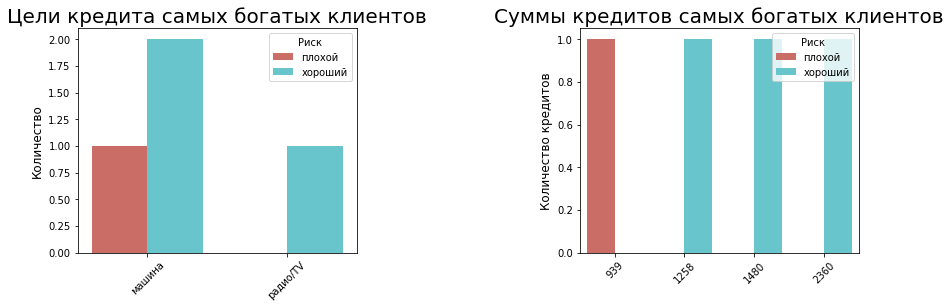

In [153]:
#6.3) У кого больше всего денег в банке? Постройте графики распределения по полу и возрасту. На что они хотят взять кредит, на какую сумму? Какие цели самых бедных людей?


df_rich = df_credit[(df_credit["Сберегательные счета"] == 'очень большой') & (df_credit["Обычные счета"] == 'большой')]

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Цель", data=df_rich, 
              palette="hls", hue = "Риск")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Количество", fontsize=12)
g.set_title("Цели кредита самых богатых клиентов", fontsize=20)

plt.subplot(222)
g = sns.countplot(x="Сумма кредита", data=df_rich, 
              palette="hls", hue = "Риск")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Количество кредитов", fontsize=12)
g.set_title("Суммы кредитов самых богатых клиентов", fontsize=20)

plt.subplots_adjust(hspace = 0.6, wspace = 0.8, top = 0.8)

plt.show()


Основная цель кредита самых богатых клиентов - это машина. Наибольшая сумма кредита среди самых богатых клиентов - 2360

In [154]:
#6.4) У кого больше всего денег в банке? Постройте графики распределения по полу и возрасту. На что они хотят взять кредит, на какую сумму? Какие цели самых бедных людей?

trace0 = go.Bar(
            x = df_credit[(df_credit["Сберегательные счета"] == 'маленький') & (df_credit["Обычные счета"] == 'маленький') & (df_credit["Риск"] == 'хороший')]["Цель"].value_counts().index.values,
            y = df_credit[(df_credit["Сберегательные счета"] == 'маленький') & (df_credit["Обычные счета"] == 'маленький') & (df_credit["Риск"] == 'хороший')]["Цель"].value_counts().values,
            name = "Хороший кредитный рейтинг"
    )

trace1 = go.Bar(
            x = df_credit[(df_credit["Сберегательные счета"] == 'маленький') & (df_credit["Обычные счета"] == 'маленький') & (df_credit["Риск"] == 'плохой')]["Цель"].value_counts().index.values,
            y = df_credit[(df_credit["Сберегательные счета"] == 'маленький') & (df_credit["Обычные счета"] == 'маленький') & (df_credit["Риск"] == 'плохой')]["Цель"].value_counts().values,
            name = "Плохой кредитный рейтинг"
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Количество'
    ),
    xaxis=dict(
        title='Цель'
    ),
    title='Цели самых бедных клиентов'
)

'''
fig = px.bar(data_canada, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'},)
'''
fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    autosize=False,
    width=600,
    height=600,)

fig.show(renderer='colab')

Основная цель кредита самых бедных клиентов банка - машина. 

In [155]:
#5.1) Определите характеристики лучшего и худшего человека для кредита, то есть того, кому 100% дадут и не дадут кредит.
df_age = df_credit.loc[df_credit["Риск"] == 'хороший']['Возраст'].values.tolist()
df_job = df_credit.loc[df_credit["Риск"] == 'хороший']['Место работы'].values.tolist()
df_sex = df_credit.loc[df_credit["Риск"] == 'хороший']['Пол'].values.tolist()
df_housing = df_credit.loc[df_credit["Риск"] == 'хороший']['Жилищные условия'].values.tolist()
df_duration = df_credit.loc[df_credit["Риск"] == 'хороший']['Срок кредита'].values.tolist()
df_amount = df_credit.loc[df_credit["Риск"] == 'хороший']['Сумма кредита'].values.tolist()
df_saving = df_credit.loc[df_credit["Риск"] == 'хороший']['Сберегательные счета'].values.tolist()
df_checking = df_credit.loc[df_credit["Риск"] == 'хороший']['Обычные счета'].values.tolist()
df_purpose = df_credit.loc[df_credit["Риск"] == 'хороший']['Цель'].values.tolist()


trace0 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Возраст"
)

trace1 = go.Histogram(
    x=df_job,
    histnorm='probability',
    name="Место работы"
)

trace2 = go.Histogram(
    x=df_sex,
    histnorm='probability',
    name="Пол"
)

trace3 = go.Histogram(
    x=df_housing,
    histnorm='probability',
    name="Жилищные условия"
)

trace4 = go.Histogram(
    x=df_duration,
    histnorm='probability',
    name="Срок кредита"
)

trace5 = go.Histogram(
    x=df_amount,
    histnorm='probability',
    name="Сумма кредита"
)

trace6 = go.Histogram(
    x=df_saving,
    histnorm='probability',
    name="Сберегательные счета"
)

trace7 = go.Histogram(
    x=df_checking,
    histnorm='probability',
    name="Обычные счета"
)

trace8 = go.Histogram(
    x=df_purpose,
    histnorm='probability',
    name="Цель"
)


#Создание сети
fig = tls.make_subplots(rows=3, cols=3, specs=[[{}, {}, {}], [{}, {}, {}], [{}, {}, {}]],
                          subplot_titles=('Возраст','Место работы', 'Пол', 'Жилищные условия', 'Срок кредита', 'Сумма кредита', 'Сберегательные счета', 'Обычные счета', 'Цель',),  horizontal_spacing=0.1,)
#Создание графиков
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 2, 3)
fig.append_trace(trace6, 3, 1)
fig.append_trace(trace7, 3, 2)
fig.append_trace(trace8, 3, 3)

fig['layout'].update(showlegend=True, title='Лучший человек для кредита', bargap=0.05)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1500,)

fig.update_layout(margin=dict(l=70, r=0, t=100, b=0))

fig.show(renderer='colab')
#py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')




Больше всего людей с хорошим кредитным рейтингом имеют следующие характеристики - возраст 26-27, место работы - 2 (резидент, неквалифицированный), пол - мужской, жилищная собственность, срок кредита - 12-13 месяцев, сумма кредита - $1000-1499, маленький сберегательный счет, средний обычный счет, кредит на машину.


In [156]:
#5.2) Определите характеристики лучшего и худшего человека для кредита, то есть того, кому 100% дадут и не дадут кредит.
df_age = df_credit.loc[df_credit["Риск"] == 'плохой']['Возраст'].values.tolist()
df_job = df_credit.loc[df_credit["Риск"] == 'плохой']['Место работы'].values.tolist()
df_sex = df_credit.loc[df_credit["Риск"] == 'плохой']['Пол'].values.tolist()
df_housing = df_credit.loc[df_credit["Риск"] == 'плохой']['Жилищные условия'].values.tolist()
df_duration = df_credit.loc[df_credit["Риск"] == 'плохой']['Срок кредита'].values.tolist()
df_amount = df_credit.loc[df_credit["Риск"] == 'плохой']['Сумма кредита'].values.tolist()
df_saving = df_credit.loc[df_credit["Риск"] == 'плохой']['Сберегательные счета'].values.tolist()
df_checking = df_credit.loc[df_credit["Риск"] == 'плохой']['Обычные счета'].values.tolist()
df_purpose = df_credit.loc[df_credit["Риск"] == 'плохой']['Цель'].values.tolist()


trace0 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Возраст"
)

trace1 = go.Histogram(
    x=df_job,
    histnorm='probability',
    name="Место работы"
)

trace2 = go.Histogram(
    x=df_sex,
    histnorm='probability',
    name="Пол"
)

trace3 = go.Histogram(
    x=df_housing,
    histnorm='probability',
    name="Жилищные условия"
)

trace4 = go.Histogram(
    x=df_duration,
    histnorm='probability',
    name="Срок кредита"
)

trace5 = go.Histogram(
    x=df_amount,
    histnorm='probability',
    name="Сумма кредита"
)

trace6 = go.Histogram(
    x=df_saving,
    histnorm='probability',
    name="Сберегательные счета"
)

trace7 = go.Histogram(
    x=df_checking,
    histnorm='probability',
    name="Обычные счета"
)

trace8 = go.Histogram(
    x=df_purpose,
    histnorm='probability',
    name="Цель"
)


#Создание сети
fig = tls.make_subplots(rows=3, cols=3, specs=[[{}, {}, {}], [{}, {}, {}], [{}, {}, {}]],
                          subplot_titles=('Возраст','Место работы', 'Пол', 'Жилищные условия', 'Срок кредита', 'Сумма кредита', 'Сберегательные счета', 'Обычные счета', 'Цель',),  horizontal_spacing=0.1,)
#Создание графиков
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 2, 3)
fig.append_trace(trace6, 3, 1)
fig.append_trace(trace7, 3, 2)
fig.append_trace(trace8, 3, 3)

fig['layout'].update(showlegend=True, title='Худший человек для кредита', bargap=0.05)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1500,)

fig.update_layout(margin=dict(l=70, r=0, t=100, b=0))

fig.show(renderer='colab')
#py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')




Больше всего людей с плохим кредитным рейтингом имеют следующие характеристики - возраст 25-29,место работы - 2 (резидент, неквалифицированный), пол - мужской, жилищная собственность, срок кредита - 20-24 месяцев, сумма кредита - $1000-1999, маленький сберегательный счет, маленький обычный счет, кредит на машину.